Because this notebook is quite large, enabling the `collapsible_headings` extension is recommended.

In [1]:
%load_ext watermark
%watermark -m -p pandas,numpy,matplotlib,seaborn

pandas 0.22.0
numpy 1.14.3
matplotlib 2.2.2
seaborn 0.9.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.10.0-32-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import LabelEncoder

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

## Read Data 

In [3]:
df_claims = pd.read_csv("../data/claim_0702.csv")
df_policy = pd.read_csv("../data/policy_0702.csv")
df_train  = pd.read_csv("../data/training-set.csv")
df_test   = pd.read_csv("../data/testing-set.csv")

In [4]:
# Take a Peek
df_train.head()

,Policy_Number,Next_Premium
0,8e31b2f7864ddeac1be3a31766b0bf2c54908d37,4414
1,3f9f289dd1b20494a2fe4b1f0fe2d78333c97eda,8236
2,9864c955e499d1fa908f5dc7292054a232f01722,6153
3,92170afa649706baf10774dc0a46e67617c0d50d,12135
4,d16c11ef69f5f6bac02ed18fb1e372394563697f,4345


In [5]:
# Check Duplicates
assert df_train.Policy_Number.unique().shape[0] == df_train.shape[0]

In [6]:
# Take a Peek
df_test.head()

,Policy_Number,Next_Premium
0,55789b8f86893761c9aa9e7bf17938e737decc68,100
1,b6df13a3384528ba6339c52b4fff7c149de68011,100
2,e112d926103147bcdcb6dab201b736185a3e2520,100
3,aa346fa4b1931d1c7a55f8e1bca40b0927dd65ac,100
4,39c4d5daaa791676ec5559c9066d7e8e8dfc51d7,100


In [7]:
# Check Duplicates
assert df_test.Policy_Number.unique().shape[0] == df_test.shape[0]

In [8]:
# Take a Peek
df_claims.head()

,Claim_Number,Nature_of_the_claim,Policy_Number,Driver's_Gender,Driver's_Relationship_with_Insured,DOB_of_Driver,Marital_Status_of_Driver,Accident_Date,Cause_of_Loss,Paid_Loss_Amount,paid_Expenses_Amount,Salvage_or_Subrogation?,Coverage,Vehicle_identifier,At_Fault?,"Claim_Status_(close,_open,_reopen_etc)",Deductible,Accident_area,number_of_claimants,Accident_Time
0,954ff50c11e2c6f6bf91514fdcca98578128da21,1,91dc13e4e24dc9e0e0940c63924109e4ff66e18a,1,3,06/1969,1,2015/01,17ba0791499db908433b80f37c5fbc89b870084b,56705,0,0,00I,86ada5177903be297607713f3e0128e7b3f8a839,100.00,1,3000,356a192b7913b04c54574d18c28d46e6395428ab,1.98,08:00
1,954ff50c11e2c6f6bf91514fdcca98578128da21,1,91dc13e4e24dc9e0e0940c63924109e4ff66e18a,1,3,06/1969,1,2015/01,17ba0791499db908433b80f37c5fbc89b870084b,30000,700,0,16P,86ada5177903be297607713f3e0128e7b3f8a839,100.00,1,0,356a192b7913b04c54574d18c28d46e6395428ab,1.98,08:00
2,954ff50c11e2c6f6bf91514fdcca98578128da21,1,91dc13e4e24dc9e0e0940c63924109e4ff66e18a,1,3,06/1969,1,2015/01,17ba0791499db908433b80f37c5fbc89b870084b,1100,0,0,16G,86ada5177903be297607713f3e0128e7b3f8a839,100.00,1,0,356a192b7913b04c54574d18c28d46e6395428ab,1.98,08:00
3,e33ba1121d6772dd84e83b266d66b1a7dea26d71,1,83ec7fa50d3f77f9739f0ce8d0139514e2a5f3e7,2,2,09/1975,1,2015/01,17ba0791499db908433b80f37c5fbc89b870084b,151795,700,0,16G,0baf14fc451d6fef13ac82be90523fa7805df093,100.00,1,0,a17554a0d2b15a664c0e73900184544f19e70227,1.98,08:00
4,f26827172ff9528d11c66868cbf57f4e9c2d537c,1,bb616a58f59cd6d1b51c0343aa2aab2ff03a7b48,2,2,02/1971,1,2015/01,17ba0791499db908433b80f37c5fbc89b870084b,0,0,0,16P,34209497dbd08b03d61c532acf939cd1f194bfd2,100.00,1,0,511a418e72591eb7e33f703f04c3fa16df6c90bd,1.98,08:00


In [9]:
# Take a Peek
df_policy.head()

,Policy_Number,Insured's_ID,Prior_Policy_Number,Cancellation,Vehicle_identifier,Vehicle_Make_and_Model1,Vehicle_Make_and_Model2,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,...,iply_area,dbirth,fequipment1,fequipment2,fequipment3,fequipment4,fequipment5,fequipment6,fequipment9,nequipment9
0,79110176bf64b5094c19aad785aeac56e36cb609,Ae03a1ba75867f060504f8ee798d06275a5e5bb9c,e1379d9c360fe4a20027b8acc161ec93f2727e66,,a05c4dbcfc92d99e715441b9cd3fcab5ce117be5,7d1fedf43d62c640985e40c5628fea6d902c142b,566bb5a9ea0fa963636632a0d1754ea06da11c13,2010,1342,10,...,c1dfd96eea8cc2b62785275bca38ac261256e278,08/1984,0,0,0,0,0,0,0,
1,79110176bf64b5094c19aad785aeac56e36cb609,Ae03a1ba75867f060504f8ee798d06275a5e5bb9c,e1379d9c360fe4a20027b8acc161ec93f2727e66,,a05c4dbcfc92d99e715441b9cd3fcab5ce117be5,7d1fedf43d62c640985e40c5628fea6d902c142b,566bb5a9ea0fa963636632a0d1754ea06da11c13,2010,1342,10,...,c1dfd96eea8cc2b62785275bca38ac261256e278,08/1984,0,0,0,0,0,0,0,
2,61a449f6180b23379a584af904d7412205d8ff8c,J7697af29d66cb8a160fb68b1412ef06716ca4a57,a2f57eef440f29783da32b4e3708e0ea5b84b9c4,,6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a,9e1816a8c2a63b7f96a82ce6487b2d43222750db,de17c3df362a74aef9d15b1c95ff5cf7ff94f628,2006,1794,10,...,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b,10/1975,0,0,0,0,0,0,0,
3,61a449f6180b23379a584af904d7412205d8ff8c,J7697af29d66cb8a160fb68b1412ef06716ca4a57,a2f57eef440f29783da32b4e3708e0ea5b84b9c4,,6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a,9e1816a8c2a63b7f96a82ce6487b2d43222750db,de17c3df362a74aef9d15b1c95ff5cf7ff94f628,2006,1794,10,...,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b,10/1975,0,0,0,0,0,0,0,
4,1a1f5f582bf1ff23467352e8f2fd31acefddc654,Fcd3d3578e9ae55aa6140da432f69db2bd0c50fad,bd864927fc796b75c917ade554c0657d22b860bd,,3828f4a4c40ac91647919306d0de0d11043d89fe,de36049ef6a91e6dd1a031ab5501beca28cc3610,cca82bf061cfd670f460f9e4a1b9ca853378382b,2006,1341,10,...,c1dfd96eea8cc2b62785275bca38ac261256e278,12/1989,0,0,0,0,0,0,0,


## Examine Data

### Check Policies

#### Overview
Same policy can have multiple rows in df_policy. Here's an example that can help us find which columns can be different within the same policy:

In [10]:
df_policy.iloc[0] == df_policy.iloc[1]

Policy_Number                                  True
Insured's_ID                                   True
Prior_Policy_Number                            True
Cancellation                                   True
Vehicle_identifier                             True
Vehicle_Make_and_Model1                        True
Vehicle_Make_and_Model2                        True
Manafactured_Year_and_Month                    True
Engine_Displacement_(Cubic_Centimeter)         True
Imported_or_Domestic_Car                       True
Coding_of_Vehicle_Branding_&_Type              True
qpt                                            True
fpt                                            True
Main_Insurance_Coverage_Group                  True
Insurance_Coverage                            False
Insured_Amount1                               False
Insured_Amount2                                True
Insured_Amount3                               False
Coverage_Deductible_if_applied                 True
Premium     

Take a look at the actual data values:

In [11]:
df_policy.iloc[:2].transpose()

,0,1
Policy_Number,79110176bf64b5094c19aad785aeac56e36cb609,79110176bf64b5094c19aad785aeac56e36cb609
Insured's_ID,Ae03a1ba75867f060504f8ee798d06275a5e5bb9c,Ae03a1ba75867f060504f8ee798d06275a5e5bb9c
Prior_Policy_Number,e1379d9c360fe4a20027b8acc161ec93f2727e66,e1379d9c360fe4a20027b8acc161ec93f2727e66
Cancellation,,
Vehicle_identifier,a05c4dbcfc92d99e715441b9cd3fcab5ce117be5,a05c4dbcfc92d99e715441b9cd3fcab5ce117be5
Vehicle_Make_and_Model1,7d1fedf43d62c640985e40c5628fea6d902c142b,7d1fedf43d62c640985e40c5628fea6d902c142b
Vehicle_Make_and_Model2,566bb5a9ea0fa963636632a0d1754ea06da11c13,566bb5a9ea0fa963636632a0d1754ea06da11c13
Manafactured_Year_and_Month,2010,2010
Engine_Displacement_(Cubic_Centimeter),1342,1342
Imported_or_Domestic_Car,10,10


Another example:

In [12]:
df_policy.iloc[2:4].transpose()

,2,3
Policy_Number,61a449f6180b23379a584af904d7412205d8ff8c,61a449f6180b23379a584af904d7412205d8ff8c
Insured's_ID,J7697af29d66cb8a160fb68b1412ef06716ca4a57,J7697af29d66cb8a160fb68b1412ef06716ca4a57
Prior_Policy_Number,a2f57eef440f29783da32b4e3708e0ea5b84b9c4,a2f57eef440f29783da32b4e3708e0ea5b84b9c4
Cancellation,,
Vehicle_identifier,6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a,6d30feebf8bf0e46af73cd2a1d0649d4f0f83f8a
Vehicle_Make_and_Model1,9e1816a8c2a63b7f96a82ce6487b2d43222750db,9e1816a8c2a63b7f96a82ce6487b2d43222750db
Vehicle_Make_and_Model2,de17c3df362a74aef9d15b1c95ff5cf7ff94f628,de17c3df362a74aef9d15b1c95ff5cf7ff94f628
Manafactured_Year_and_Month,2006,2006
Engine_Displacement_(Cubic_Centimeter),1794,1794
Imported_or_Domestic_Car,10,10


The Number of Policies and the Number of Rows in df_policy (from these you get the average rows per policy):

In [13]:
df_policy.shape[0]

1747942

In [14]:
df_policy.Policy_Number.unique().shape[0]

351273

Check the statistics of the premiums from the same policy:

In [15]:
df_policy_agg = df_policy.groupby("Policy_Number")["Premium"].agg(["count", "min", "max", "sum"]).reset_index()
df_policy_agg.describe()

,count,min,max,sum
count,351273.00,351273.00,351273.00,351273.00
mean,4.98,328.32,3521.40,6600.50
std,2.56,727.25,6538.00,8881.38
min,1.00,0.00,2.00,4.00
25%,3.00,26.00,1240.00,2710.00
50%,5.00,102.00,1647.00,3839.00
75%,6.00,388.00,3011.00,6957.00
max,18.00,106660.00,504932.00,627091.00


Summary:

In [16]:
print("# of policies: ", df_policy.shape[0])
print("# of unique policies: ", df_policy_agg.shape[0])
print("# of claims: ", df_claims.shape[0])
print("# of train policies: ", df_train.shape[0])
print("# of test policies: ", df_test.shape[0])

# of policies:  1747942
# of unique policies:  351273
# of claims:  69613
# of train policies:  210763
# of test policies:  140510


#### Relationship between the current premium and the next premium

In [17]:
# Crafting "Total_Paid" column
df_claims["Total_Paid"] = df_claims["Paid_Loss_Amount"] + df_claims["paid_Expenses_Amount"]
# Group claims by policy
claims_per_policy = pd.concat(
    [df_train, df_test], axis=0)[["Policy_Number"]].merge(
    df_claims.groupby("Policy_Number")["Paid_Loss_Amount"].agg(["count", "sum"]).reset_index(), 
    on="Policy_Number", how="left"
).fillna(0)
claims_per_policy.rename(columns={"count": "claims", "sum": "Total_Paid"}, inplace=True)

In [18]:
df_train_agg = df_policy_agg.merge(df_train, on="Policy_Number")
df_train_agg = df_train_agg.merge(claims_per_policy, on="Policy_Number")
df_train_agg.head()

,Policy_Number,count,min,max,sum,Next_Premium,claims,Total_Paid
0,0000d65ef9b4e9e5e9603617bd5fb8497b7f02b5,7,80,5352,9132,7070,0.00,0.00
1,0001221abee6f59d6d40eeb1ba9ffa0f4f92b36b,3,780,1280,2861,3081,0.00,0.00
2,0001ad0ad0618f6d2e2c1875105adce6bcd77c2c,3,286,1024,2195,0,0.00,0.00
3,00022176b92ea50700fea7e2003cd25cfd2ccc5c,2,913,1042,1955,2190,0.00,0.00
4,00026ca0e304a4be19f0cec1121ff33ef81146c5,7,126,6379,10306,10240,0.00,0.00


Text(0.5,1,'Distribution of Next_Premium (Log Scale)')

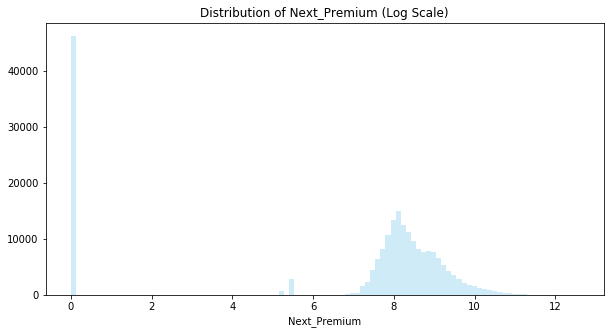

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(
    np.log1p(df_train_agg["Next_Premium"]), bins=100, color="skyblue",
    kde=False
)
ax.set_title("Distribution of Next_Premium (Log Scale)")

In [20]:
nominal_changes = (df_train_agg["Next_Premium"] - df_train_agg["sum"])
nominal_changes.describe()

count    210763.00
mean      -1867.47
std        6139.04
min     -359757.00
25%       -2339.00
50%        -205.00
75%           0.00
max      101938.00
dtype: float64

Text(0.5,1,'Distribution of Nominal Changes (excluding Next_Premium == 0)')

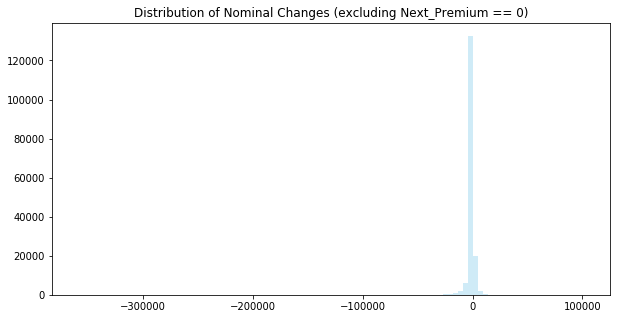

In [21]:
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(
    nominal_changes[df_train_agg.Next_Premium > 0].values, bins=100, color="skyblue",
    kde=False
)
ax.set_title("Distribution of Nominal Changes (excluding Next_Premium == 0)")

In [22]:
percentage_changes = nominal_changes / df_train_agg["sum"] * 100
percentage_changes.describe()

count   210763.00
mean       -18.88
std         99.81
min       -100.00
25%        -33.13
50%         -5.49
75%          0.00
max      19279.82
dtype: float64

In [23]:
# Outliers
percentage_changes[percentage_changes > 500].shape

(448,)

Text(0.5,1,'Distribution of Percentage Changes(excluding Next_Premium == 0 and outliers)')

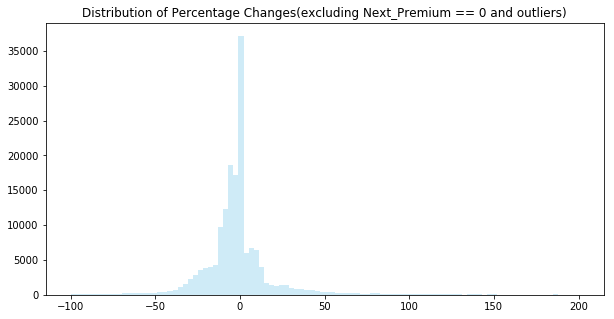

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(
    percentage_changes[(df_train_agg.Next_Premium > 0) & (percentage_changes<200)].values, 
    bins=100, color="skyblue",
    kde=False
)
ax.set_title("Distribution of Percentage Changes(excluding Next_Premium == 0 and outliers)")

Plot Next_Premium against Sum of Policy Premiums (Excluding Next_Premium == 0. In log scale.):

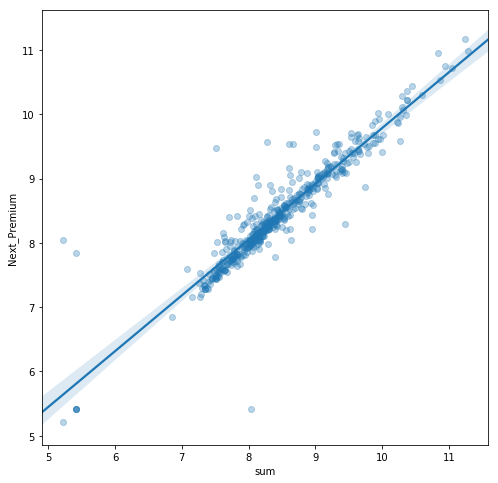

In [25]:
fig = plt.figure(figsize=(8, 8))
sample = df_train_agg[df_train_agg.Next_Premium != 0].sample(500)
ax = sns.regplot(
    x=np.log1p(sample["sum"]), 
    y=np.log1p(sample["Next_Premium"]), 
    scatter_kws={'alpha': 0.3})

How about the minimums of policy premiums? (in log scale) :

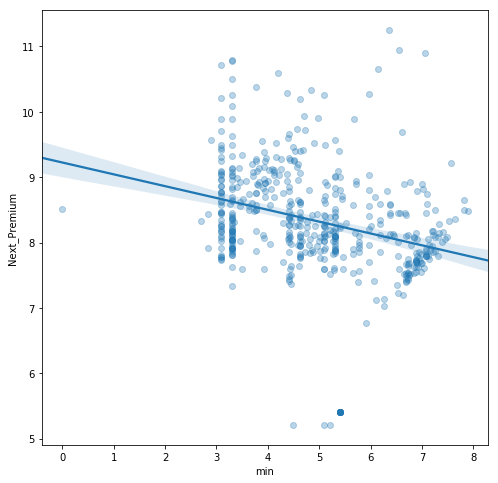

In [26]:
fig = plt.figure(figsize=(8, 8))
sample = df_train_agg[df_train_agg.Next_Premium != 0].sample(500)
ax = sns.regplot(
    x=np.log1p(sample["min"]), 
    y=np.log1p(sample["Next_Premium"]), 
    scatter_kws={'alpha': 0.3})

And how about the maximums? (in log scale):

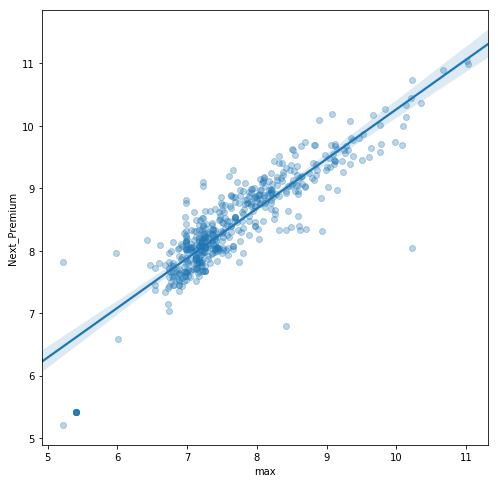

In [27]:
fig = plt.figure(figsize=(8, 8))
sample = df_train_agg[df_train_agg.Next_Premium != 0].sample(500)
ax = sns.regplot(
    x=np.log1p(sample["max"]), 
    y=np.log1p(sample["Next_Premium"]), 
    scatter_kws={'alpha': 0.3})

Those which changed the most (nominally):

In [28]:
tmp = df_train_agg.iloc[np.argsort(np.abs(nominal_changes))[-100:][::-1]]
tmp[tmp.Next_Premium > 0][:10]

,Policy_Number,count,min,max,sum,Next_Premium,claims,Total_Paid
187767,e421418c1d5d881e5960a498aa7a4f62634a2c33,9,1168,504932,627091,267334,0.00,0.00
44932,3664f7bf97b724acc883bb4e8b4f74b1667ec63a,9,169,365321,390464,76598,0.00,0.00
53348,40b5b793504446105a5b8846d5da75741a22c67f,9,26,434117,504468,195277,0.00,0.00
98123,76fa158825543c81904b0cae2c6044748d8f4739,6,770,245702,264735,80936,0.00,0.00
153568,ba28952794ff23ee2a3e2b5a660be8584d550fdb,8,136,267883,290000,112702,0.00,0.00
18857,16cbc7f120e4dc7d1ddf4c62bb308b82759b537c,12,21,154232,175910,7703,1.00,102860.00
88304,6b214425d18bf2de76e9183a882d945c33f31fcd,7,25,364572,435100,286891,0.00,0.00
83212,64ea7e188d01f60470a3d73829d8ae091730f0f0,9,202,243110,271320,131102,0.00,0.00
109734,852c30bc2a605baa4ff34ef51ad3fb62fc140910,8,202,318562,377782,239755,1.00,55790.00
149308,b4f923b3d2f475cb4a2cbb54e1fd83d119037fd3,6,591,288961,320033,192824,0.00,0.00


Those which changed the most (in percentage):

In [29]:
tmp = df_train_agg.iloc[np.argsort(np.abs(percentage_changes))[-100:][::-1]]
tmp[tmp.Next_Premium > 0][:10]

,Policy_Number,count,min,max,sum,Next_Premium,claims,Total_Paid
171714,d057cb43a6be455377c784795481800bc89df0be,1,223,223,223,43217,0.00,0.00
18114,15de0c3702f18b53fc4b0e09e9464f4c7ef1018b,1,223,223,223,20714,0.00,0.00
78578,5f3c3b35a0a5967a571e18db3565ac9b837948e7,1,223,223,223,15211,0.00,0.00
185345,e112a96eafd3e1e9c8394a58fb3259a6aaaa3503,1,223,223,223,12805,0.00,0.00
145041,afd053cbcfe9b50a60ca1c13f0fd023c924b8fc1,1,223,223,223,12130,0.00,0.00
86437,68e7dcf7bd634247efa410f81617ca0d59088d9f,1,183,183,183,7854,0.00,0.00
71579,56a522281f6d4a813d843ad9186f19d0d1279768,1,223,223,223,9480,0.00,0.00
128429,9bea18ced6ea93dc0866bdf127919f006a8512bb,1,183,183,183,7443,0.00,0.00
16590,14027504a1507934e04eb152b5eaacc11d79876f,1,223,223,223,8443,0.00,0.00
75208,5b2329599112a81d8b200f0725d1cb90389585de,1,223,223,223,8362,0.00,0.00


Those which did not change at all:

In [30]:
tmp = df_train_agg[df_train_agg.Next_Premium == df_train_agg["sum"]]
print(tmp.shape[0], tmp.shape[0] / df_train_agg.shape[0] * 100)
tmp.head()

25337 12.021559761438203


,Policy_Number,count,min,max,sum,Next_Premium,claims,Total_Paid
16,0006e8c922fa31d73a42488f9cc0b5b47439f826,2,1186,1240,2426,2426,0.00,0.00
19,0009df58f0d6aca975d0dbcedfb65fa5cb0e0eec,3,101,1859,3739,3739,0.00,0.00
27,000b9afedf86aab7969f490b3f62d03425148762,2,801,1073,1874,1874,0.00,0.00
33,000c517b20b4297988f3e0c9ced664e4d3b6d865,1,223,223,223,223,0.00,0.00
50,0010c37b3913216005b1a5fe75989af0778bba11,5,50,1797,4699,4699,0.00,0.00


#### Find columns that could change within a policy

Columns with max > 1 are the suspects:

In [31]:
df_policy.groupby("Policy_Number")[[
    'Insured\'s_ID', 'Prior_Policy_Number', 'Vehicle_identifier', 
    'Main_Insurance_Coverage_Group', 'Insurance_Coverage',
    'Premium', 'ibirth', 'dbirth',
    'fequipment1', 'fequipment2', 'fequipment3',
]].nunique().describe()

,Insured's_ID,Prior_Policy_Number,Vehicle_identifier,Main_Insurance_Coverage_Group,Insurance_Coverage,Premium,ibirth,dbirth,fequipment1,fequipment2,fequipment3
count,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00,351273.00
mean,1.00,0.80,1.00,1.83,4.98,4.97,0.84,0.87,1.00,1.00,1.00
std,0.00,0.40,0.01,0.80,2.56,2.55,0.37,0.33,0.00,0.00,0.00
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00
25%,1.00,1.00,1.00,1.00,3.00,3.00,1.00,1.00,1.00,1.00,1.00
50%,1.00,1.00,1.00,2.00,5.00,5.00,1.00,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,2.00,6.00,6.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,3.00,18.00,18.00,1.00,1.00,1.00,1.00,1.00


Some other random checkings:

In [32]:
df_policy.groupby("Policy_Number")[['qpt', 'lia_class', 'plia_acc', 'pdmg_acc']].nunique().describe()

,qpt,lia_class,plia_acc,pdmg_acc
count,351273.00,351273.00,351273.00,351273.00
mean,1.00,1.00,1.00,1.00
std,0.00,0.00,0.00,0.00
min,1.00,1.00,1.00,1.00
25%,1.00,1.00,1.00,1.00
50%,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00


In [33]:
df_policy.groupby("Policy_Number")['Multiple_Products_with_TmNewa_(Yes_or_No?)'].max().value_counts(dropna=False)[:10]

0.00     318744
2.00      14832
1.00       5703
4.00       2551
3.00       1792
6.00       1013
5.00        962
7.00        714
8.00        487
12.00       351
10.00       269
Name: Multiple_Products_with_TmNewa_(Yes_or_No?), dtype: int64

In [34]:
(df_policy["ibirth"] == df_policy["dbirth"]).sum() / df_policy.shape[0]

0.7718808747658675

#### Count Unique Values

In [35]:
df_policy.fillna(-1).nunique()

Policy_Number                                 351273
Insured's_ID                                  299999
Prior_Policy_Number                           281678
Cancellation                                       2
Vehicle_identifier                            347883
Vehicle_Make_and_Model1                          136
Vehicle_Make_and_Model2                         8112
Manafactured_Year_and_Month                       49
Engine_Displacement_(Cubic_Centimeter)           768
Imported_or_Domestic_Car                          10
Coding_of_Vehicle_Branding_&_Type               7405
qpt                                               19
fpt                                                1
Main_Insurance_Coverage_Group                      3
Insurance_Coverage                                60
Insured_Amount1                                  111
Insured_Amount2                                   89
Insured_Amount3                                 3071
Coverage_Deductible_if_applied                

In [36]:
df_policy[['Policy_Number', 'fsex']].drop_duplicates()['fsex'].value_counts(dropna=False)

2      153252
1      141706
        49206
NaN      7109
Name: fsex, dtype: int64

In [37]:
df_policy[['Policy_Number', 'Imported_or_Domestic_Car']].drop_duplicates()['Imported_or_Domestic_Car'].value_counts(dropna=False)

10    281715
30     36449
40     22081
24      3710
20      3352
50      2679
90      1041
21       189
22        50
23         7
Name: Imported_or_Domestic_Car, dtype: int64

#### Investigate Cancellation

In [38]:
df_cancellation = df_policy[["Policy_Number", "Cancellation"]].drop_duplicates()
print(df_cancellation.shape, df_policy.shape)
df_cancellation = df_cancellation.merge(df_train, on="Policy_Number")
df_cancellation["is_zero"] = df_cancellation["Next_Premium"] == 0
df_cancellation.groupby("Cancellation")[["is_zero"]].agg(["mean", "count"])

(351273, 2) (1747942, 41)


is_zero        
                mean   count
Cancellation                
                0.20  170378
Y               0.32   40385

### Check Claims

Unique column values:

In [39]:
df_claims.fillna(-1).nunique()

Claim_Number                              41137
Nature_of_the_claim                           2
Policy_Number                             35895
Driver's_Gender                               2
Driver's_Relationship_with_Insured            7
DOB_of_Driver                               798
Marital_Status_of_Driver                      2
Accident_Date                                24
Cause_of_Loss                                17
Paid_Loss_Amount                          17229
paid_Expenses_Amount                        799
Salvage_or_Subrogation?                    2056
Coverage                                     48
Vehicle_identifier                        35715
At_Fault?                                    24
Claim_Status_(close,_open,_reopen_etc)        2
Deductible                                   67
Accident_area                                22
number_of_claimants                          14
Accident_Time                                39
Total_Paid                              

Text(0.5,1,'Total_Paid (in log scale)')

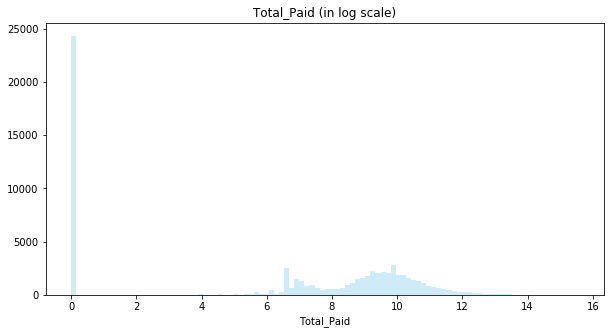

In [40]:
# Take total paid in log scale
df_claims['Total_Paid'] = np.log1p(df_claims["Paid_Loss_Amount"] + df_claims["paid_Expenses_Amount"])
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(
    df_claims['Total_Paid'], bins=100, color="skyblue", label="1", 
    kde=False)
ax.set_title("Total_Paid (in log scale)")

At_Fault values are noisy:

In [41]:
df_claims['At_Fault?'].value_counts()

100.00    30587
0.00      21721
70.00      8150
30.00      5168
50.00      3652
80.00        61
40.00        52
15.00        47
60.00        21
45.00        20
35.00        18
85.00        17
49.00        12
25.00        10
20.00         8
21.00         7
75.00         6
90.00         5
200.00        4
10.00         3
65.00         3
300.00        1
55.00         1
Name: At_Fault?, dtype: int64

Make it simpler:

In [42]:
df_claims.loc[df_claims['At_Fault?'] > 100, 'At_Fault?'] = 100
df_claims.loc[(df_claims['At_Fault?'] > 0) & (df_claims['At_Fault?'] < 100), 'At_Fault?'] = 50
df_claims['At_Fault?'].value_counts()

100.00    30592
0.00      21721
50.00     17261
Name: At_Fault?, dtype: int64

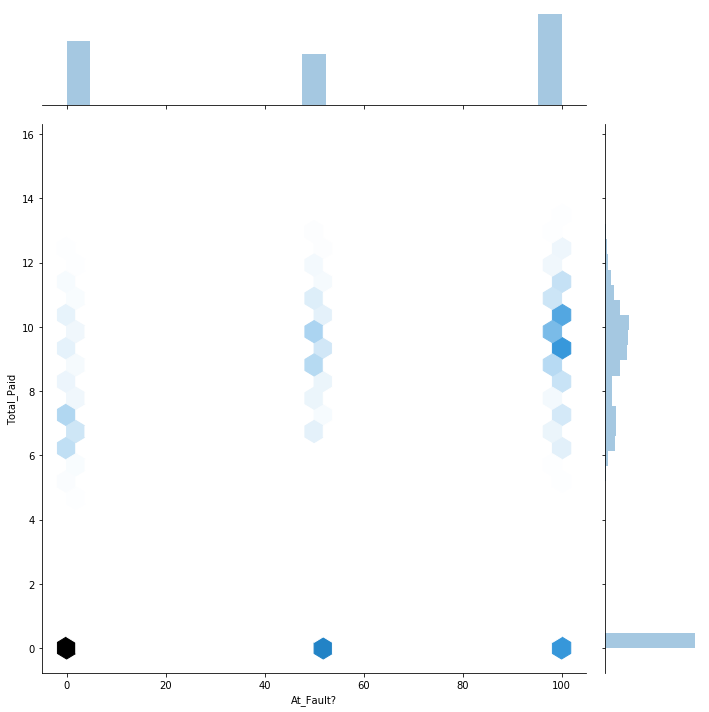

In [43]:
tmp = df_claims[['At_Fault?', 'Total_Paid']]
sns.jointplot(x=tmp["At_Fault?"], y=tmp['Total_Paid'], kind="hex", height=10)

Claim_Status is basically useless:

In [44]:
df_claims['Claim_Status_(close,_open,_reopen_etc)'].value_counts()

1    69604
0        9
Name: Claim_Status_(close,_open,_reopen_etc), dtype: int64

Did not drill deeper on this feature:

In [45]:
df_claims['DOB_of_Driver'].head()

0    06/1969
1    06/1969
2    06/1969
3    09/1975
4    02/1971
Name: DOB_of_Driver, dtype: object

### Examine Coverage

In [46]:
np.sort(df_claims['Coverage'].unique())

array(['00I', '01A', '02K', '03L', '04M', '05E', '05N', '06F', '07P',
       '08H', '09@', '10A', '12L', '14E', '14N', '15F', '15O', '16G',
       '16P', '18@', '18I', '20B', '20K', '25G', '26H', '29B', '29K',
       '32N', '33F', '33O', '34P', '35H', '36I', '40M', '41E', '41N',
       '42F', '45@', '46A', '51O', '55J', '56B', '56K', '57C', '57L',
       '66L', '70G', '70P'], dtype=object)

In [47]:
np.sort((df_policy['Main_Insurance_Coverage_Group'] + "_" + df_policy['Insurance_Coverage']).unique())

array(['竊盜_05N', '竊盜_09@', '竊盜_09I', '竊盜_10A', '竊盜_68E', '竊盜_68N',
       '車損_00I', '車損_01A', '車損_01J', '車損_02K', '車損_03L', '車損_04M',
       '車損_05E', '車損_06F', '車損_07P', '車損_08H', '車損_14N', '車損_20B',
       '車損_20K', '車損_32N', '車損_33F', '車損_33O', '車損_34P', '車損_35H',
       '車損_36I', '車損_45@', '車損_51O', '車損_55J', '車損_56B', '車損_56K',
       '車損_57C', '車損_66C', '車損_66L', '車損_67D', '車責_12L', '車責_14E',
       '車責_15F', '車責_15O', '車責_16G', '車責_16P', '車責_18@', '車責_18I',
       '車責_25G', '車責_26H', '車責_27I', '車責_29B', '車責_29K', '車責_37J',
       '車責_40M', '車責_41E', '車責_41N', '車責_42F', '車責_46A', '車責_47B',
       '車責_57L', '車責_65K', '車責_70G', '車責_70P', '車責_71H', '車責_72@'],
      dtype=object)

Take a look at coverage statistics at the policy side:

In [48]:
cnt = df_policy.groupby(["Main_Insurance_Coverage_Group", "Insurance_Coverage"]).size()
cnt[cnt > 5000]

Main_Insurance_Coverage_Group  Insurance_Coverage
竊盜                             05N                   115789
                               09@                    43348
                               10A                    17658
車損                             02K                     5821
                               03L                     7791
                               04M                    65943
                               05E                    62839
                               20B                    26055
                               20K                   108374
                               51O                     8760
                               55J                    12784
車責                             12L                    35134
                               14E                     9473
                               15F                    32276
                               15O                     8524
                               16G                

Mappings from Insurance_Coverage to Main_Insurance_Coverage_Group:

In [49]:
mappings = {k:v for _, (v,k) in df_policy[["Main_Insurance_Coverage_Group", "Insurance_Coverage"]].drop_duplicates().iterrows()}
mappings

{'00I': '車損',
 '01A': '車損',
 '01J': '車損',
 '02K': '車損',
 '03L': '車損',
 '04M': '車損',
 '05E': '車損',
 '05N': '竊盜',
 '06F': '車損',
 '07P': '車損',
 '08H': '車損',
 '09@': '竊盜',
 '09I': '竊盜',
 '10A': '竊盜',
 '12L': '車責',
 '14E': '車責',
 '14N': '車損',
 '15F': '車責',
 '15O': '車責',
 '16G': '車責',
 '16P': '車責',
 '18@': '車責',
 '18I': '車責',
 '20B': '車損',
 '20K': '車損',
 '25G': '車責',
 '26H': '車責',
 '27I': '車責',
 '29B': '車責',
 '29K': '車責',
 '32N': '車損',
 '33F': '車損',
 '33O': '車損',
 '34P': '車損',
 '35H': '車損',
 '36I': '車損',
 '37J': '車責',
 '40M': '車責',
 '41E': '車責',
 '41N': '車責',
 '42F': '車責',
 '45@': '車損',
 '46A': '車責',
 '47B': '車責',
 '51O': '車損',
 '55J': '車損',
 '56B': '車損',
 '56K': '車損',
 '57C': '車損',
 '57L': '車責',
 '65K': '車責',
 '66C': '車損',
 '66L': '車損',
 '67D': '車損',
 '68E': '竊盜',
 '68N': '竊盜',
 '70G': '車責',
 '70P': '車責',
 '71H': '車責',
 '72@': '車責'}

"竊盜" has almost no claims:

In [50]:
df_claims["main_coverage_group"] = df_claims['Coverage'].apply(lambda x: mappings[x])
df_claims["main_coverage_group"].value_counts()

車責    41191
車損    28334
竊盜       88
Name: main_coverage_group, dtype: int64

Now the coverage statistics at the claim side:

In [51]:
cnt = df_claims.groupby(["main_coverage_group", "Coverage"]).size()
cnt[cnt > 1000]

main_coverage_group  Coverage
車損                   02K          1513
                     04M         11414
                     20B          2825
                     20K          2994
                     51O          1240
                     55J          5392
車責                   16G          8570
                     16P         32030
dtype: int64

### Vehicle Manufature Date

In [52]:
np.sort(df_policy['Manafactured_Year_and_Month'].unique())

array([1911, 1917, 1921, 1958, 1960, 1970, 1971, 1972, 1974, 1976, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

### Check Train / Test Split

Find the unique policies and keep track of their order in file:

In [53]:
df_uniq_policy = df_policy[["Policy_Number"]].drop_duplicates()
df_uniq_policy["index"] = range(df_uniq_policy.shape[0])
df_uniq_policy.head()

,Policy_Number,index
0,79110176bf64b5094c19aad785aeac56e36cb609,0
2,61a449f6180b23379a584af904d7412205d8ff8c,1
4,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2
7,6b420a887376f4dce53e22e600f2ca56aadec0ee,3
8,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4


Label the train and the test dataset:

In [54]:
test_indices = df_uniq_policy.merge(df_test[["Policy_Number"]], on="Policy_Number")
train_indices = df_uniq_policy.merge(df_train[["Policy_Number"]], on="Policy_Number")
test_indices["dataset"] = "test"
train_indices["dataset"] = "train"
indices = pd.concat([train_indices, test_indices], axis=0).sort_values("index")
indices.sample(10)

,Policy_Number,index,dataset
110844,012f4efe4a7a3062436a45fb8f47f6c93a72b31d,110844,train
11467,051e1218fba1a0c0e5d2f16bb5731d841d5a8394,150323,test
106939,dcc02145c6174a7281fa8883f8f814c9562ab4da,317702,test
82641,d2f739474ba0b929238a2b4f6ff4eee25bc6dca2,293404,test
156247,8368bc5929ba5092b6c3ca96e7b6cc5b6b2c3c47,194585,train
74851,99c3127641338f28c04acdaf69251402654f9266,285614,test
137497,e35099e7052a4610c8690ef0499dca80b993d4df,348260,test
139740,283646a5e913323e110e9e52fe8ca671aaae413e,350503,test
52461,1aacf523321e1c8c4147a05287f8b126e1f00f22,263224,test
105379,c0ad8bbd5a41d13b3b7c1053214ed1bf1ddb41db,105379,train


Now check their distribution in the file:

Text(0.5,1,'Policy Index distribution')

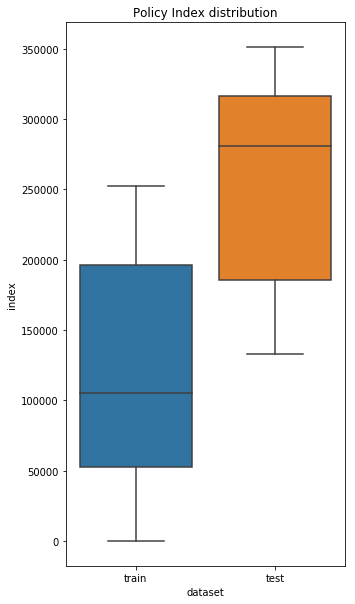

In [55]:
fig = plt.figure(figsize=(5,10))
sns.boxplot(x="dataset", y="index", data=indices).set_title('Policy Index distribution')

Text(0.5,1,'Policy Index Distribution')

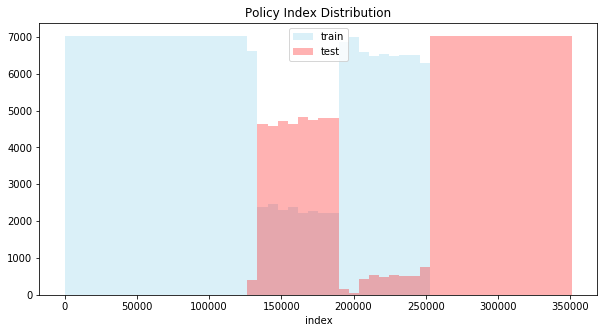

In [56]:
fig = plt.figure(figsize=(10, 5))
# "xlim":(indices["index"].min(), indices["index"].max())
sns.distplot(indices[indices.dataset=="train"]["index"], bins=50, color="skyblue", label="train", kde=False, hist_kws={"alpha": 0.3, "range":(indices["index"].min(), indices["index"].max())})
ax = sns.distplot(indices[indices.dataset=="test"]["index"], bins=50,  color="red", label="test", kde=False, hist_kws={"alpha": 0.3, "range":(indices["index"].min(), indices["index"].max())})
ax.legend()
ax.set_title("Policy Index Distribution")

In [57]:
indices[indices.dataset=="test"]["index"].min()

132854

### Check Categoricals in Train/Test
Need to find values that are exclusive to the test dataset.

In [58]:
df_policy_split = indices[["Policy_Number", "dataset"]].merge(df_policy, on="Policy_Number")

In [59]:
for col in [
    'Cancellation', 'Vehicle_Make_and_Model1',
    'Vehicle_Make_and_Model2', 'Manafactured_Year_and_Month',
    'Engine_Displacement_(Cubic_Centimeter)', 'Imported_or_Domestic_Car',
    'Coding_of_Vehicle_Branding_&_Type', 'qpt', 'fpt',
    'Main_Insurance_Coverage_Group', 'Insurance_Coverage',
    'Distribution_Channel',
    'Multiple_Products_with_TmNewa_(Yes_or_No?)', 'lia_class', 'plia_acc',
    'pdmg_acc', 'fassured', 'ibirth', 'fsex', 'fmarriage', 'aassured_zip',
    'iply_area', 'dbirth', 'fequipment1', 'fequipment2', 'fequipment3',
    'fequipment4', 'fequipment5', 'fequipment6', 'fequipment9',
    'nequipment9']:
    print(col, len(
        set(df_policy_split[df_policy_split.dataset == "test"][col].unique()) - 
        set(df_policy_split[df_policy_split.dataset == "train"][col].unique())
    ))
    # print(df_policy_split.groupby(["dataset"])[col].nunique())
    print("=" * 20)

Cancellation 0
Vehicle_Make_and_Model1 6
Vehicle_Make_and_Model2 759
Manafactured_Year_and_Month 3
Engine_Displacement_(Cubic_Centimeter) 92
Imported_or_Domestic_Car 0
Coding_of_Vehicle_Branding_&_Type 745
qpt 3
fpt 0
Main_Insurance_Coverage_Group 0
Insurance_Coverage 1
Distribution_Channel 292
Multiple_Products_with_TmNewa_(Yes_or_No?) 49
lia_class 0
plia_acc 0
pdmg_acc 0
fassured 0
ibirth 20
fsex 0
fmarriage 0
aassured_zip 423
iply_area 0
dbirth 40
fequipment1 0
fequipment2 0
fequipment3 0
fequipment4 0
fequipment5 1
fequipment6 0
fequipment9 0
nequipment9 0


Take a closer look:

In [60]:
for col in [
    'Vehicle_Make_and_Model1', 'Vehicle_Make_and_Model2', 'Manafactured_Year_and_Month',
    'Engine_Displacement_(Cubic_Centimeter)', 
    'Coding_of_Vehicle_Branding_&_Type', 'qpt',
    'Insurance_Coverage', 'Distribution_Channel',
    'Multiple_Products_with_TmNewa_(Yes_or_No?)', 
    'ibirth', 'dbirth', 'fequipment5']:
    only_in_test = (set(df_policy_split[df_policy_split.dataset == "test"][col].unique()) - 
        set(df_policy_split[df_policy_split.dataset == "train"][col].unique()))
    print(df_policy_split[df_policy_split[col].isin(only_in_test)].groupby(col).size().sort_values(ascending=False))
    print("=" * 20)

Vehicle_Make_and_Model1
6755f7ed155397d8f08ba521674f44bbca182d49    16
0fd0a1fc64071f9037ddbf3ca62bfc115847ce91    10
af6c59c504c3101b22345bb163beadb4d414b90a     4
530549c4044ca5787cdea46e6a1a7260f1f555c5     3
10fa80fbf4fb365346086d3dd0363ce8e357b469     2
e3aa2c6407995878bbf09d578637681be4a81524     1
dtype: int64
Vehicle_Make_and_Model2
a84f9cd286d35be4f8800e00b4ae24ae6ff9c7cf    67
a510d8c76bc0c4a39c04894593bc7f15272ce3d8    40
7743bd5b78d894fbdbf309ebeb33be90d475e53d    32
ca1eed7ebda61548a5e2f1d277a6f9bf39689dbe    31
1203c4b5dad2f9478f2108ccba1a468d83a8e1d2    31
ffb62362e3ae5f5ae8c1750e25559f5480e87372    30
c8e22083bd0e4f6339ce2a6d9b6280fdb7602a98    29
8f2f6763f8165c0f75682c8686d93870e1666c64    27
11eb2af2b9b25cfb5a252cdaad7a0d01455d5907    25
bd8d7c69a03796ddf4f1950a53181dafa8185736    25
d66fe9831e8881801a50c7cc180a4cb316e70a69    25
c275f3253ede8f96d6d24acbb1ad67abc556546a    25
4eebb8051d157b1281329c84089bf6e5fb70d5fd    24
c792d0a091fd81f44f51680bc8c4c68fced2b92d    24

Multiple_Products_with_TmNewa_(Yes_or_No?)
174.00     456
829.00     348
173.00     303
295.00     287
233.00     250
517.00     227
617.00     163
356.00     160
5083.00    145
180.00     109
536.00      76
297.00      71
332.00      63
340.00      60
86.00       58
1445.00     55
258.00      44
263.00      43
103.00      43
470.00      40
430.00      40
152.00      33
234.00      32
2121.00     30
3874.00     30
217.00      30
213.00      27
69.00       25
275.00      24
179.00      23
142.00      22
134.00      21
308.00      20
988.00      20
543.00      18
73.00       17
187.00      13
1170.00     13
109.00      12
58.00       11
1616.00     10
395.00      10
183.00       9
259.00       8
44.00        5
95.00        4
143.00       4
589.00       3
53.00        3
dtype: int64
ibirth
05/1926    18
04/2000    17
04/1924     9
09/1927     9
07/1930     8
04/2002     7
12/1997     6
01/1929     6
02/1912     6
02/1916     6
07/1998     5
07/1921     5
06/1925     5
09/1924     4
05/200

#### Label Encoder
Maybe setting the appropirate min_obs can make the problem go away (not entirely, though):

In [61]:
POLICY_FIXED_CATEGORICALS = [
    'Imported_or_Domestic_Car', 'Vehicle_Make_and_Model1',
    'Distribution_Channel',
    'lia_class', 'plia_acc', 'pdmg_acc',
    'fassured',  'iply_area', 'aassured_zip',
    # 'fequipment1', 'fequipment2', 'fequipment3',
    'Multiple_Products_with_TmNewa_(Yes_or_No?)'
]
encoder = LabelEncoder(min_obs=5000)
df_policy_fixed_categoricals = df_policy[
    ["Policy_Number"] + POLICY_FIXED_CATEGORICALS
].drop_duplicates().set_index("Policy_Number")
df_policy_fixed_categoricals = encoder.fit_transform(
    df_policy_fixed_categoricals[POLICY_FIXED_CATEGORICALS]
)

In [62]:
df_policy_split = indices[["Policy_Number", "dataset"]].drop_duplicates().set_index("Policy_Number").join(
    df_policy_fixed_categoricals)

Seems like we did it:

In [63]:
for col in POLICY_FIXED_CATEGORICALS:
    only_in_test = (set(df_policy_split[df_policy_split.dataset == "test"][col].unique()) - 
        set(df_policy_split[df_policy_split.dataset == "train"][col].unique()))
    print(df_policy_split[df_policy_split[col].isin(only_in_test)].groupby(col).size().sort_values(ascending=False))
    print("=" * 20)

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


Now do some double-checkingm:

In [64]:
for col in POLICY_FIXED_CATEGORICALS:
    print(col, df_policy_split[col].nunique())

Imported_or_Domestic_Car 4
Vehicle_Make_and_Model1 14
Distribution_Channel 8
lia_class 7
plia_acc 7
pdmg_acc 5
fassured 3
iply_area 15
aassured_zip 11
Multiple_Products_with_TmNewa_(Yes_or_No?) 4


In [65]:
for col in POLICY_FIXED_CATEGORICALS:
    print(df_policy_split.groupby([col, "dataset"]).size())
    print("="*20)

Imported_or_Domestic_Car  dataset
0.00                      test         4631
                          train        6397
1.00                      test       115201
                          train      166514
2.00                      test        12738
                          train       23711
3.00                      test         7940
                          train       14141
dtype: int64
Vehicle_Make_and_Model1  dataset
0.00                     test       18212
                         train      28805
1.00                     test       32062
                         train      46058
2.00                     test       30485
                         train      40116
3.00                     test       19519
                         train      31676
4.00                     test        8130
                         train      11973
5.00                     test        6416
                         train       9899
6.00                     test        5280
                      

### Check Claim Date Distributions

Parse the date string:

In [66]:
df_claims["Date"] = df_claims["Accident_Date"].apply(lambda x: datetime.strptime(x, "%Y/%m"))
df_claims["Date"].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: Date, dtype: datetime64[ns]

In [67]:
df_claims["Date"].min(), df_claims["Date"].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2016-12-01 00:00:00'))

Turn the dates into *int64* numbers:

In [68]:
df_claim_dates = df_claims.groupby("Policy_Number")["Date"].agg(["max", "min"]).reset_index()
for col in ["max", "min"]:
    df_claim_dates[col] = df_claim_dates[col].astype("int64") / 10**9 / 60 / 60 / 24 # ns / s / m / d
df_claim_dates = df_claim_dates.merge(indices, on="Policy_Number")
df_claim_dates["color"] = "green"
df_claim_dates.loc[df_claim_dates.dataset=="test", "color"] = "red"
df_claim_dates.head()

,Policy_Number,max,min,index,dataset,color
0,0004a3f30deef9fc8f9f5cb334b8bec8d79c7453,16832.00,16832.00,201393,train,green
1,0009049ed3ac539074a3cbfadb59cac6aec2fd98,17014.00,17014.00,228653,train,green
2,000949143e8dc7d5f570cb8c3b6aa51c8f8ac9ad,16770.00,16617.00,2230,train,green
3,0009dfd25805f44c7fa82c1ddb010eb3a05612f6,16953.00,16953.00,130206,train,green
4,000a5d472fa501c2e9d771dfae4af646f281f97d,17045.00,17045.00,184786,train,green


Plot the minimum claim/accident date against the policy index.

Take 5000 samples to make a scatterplot:

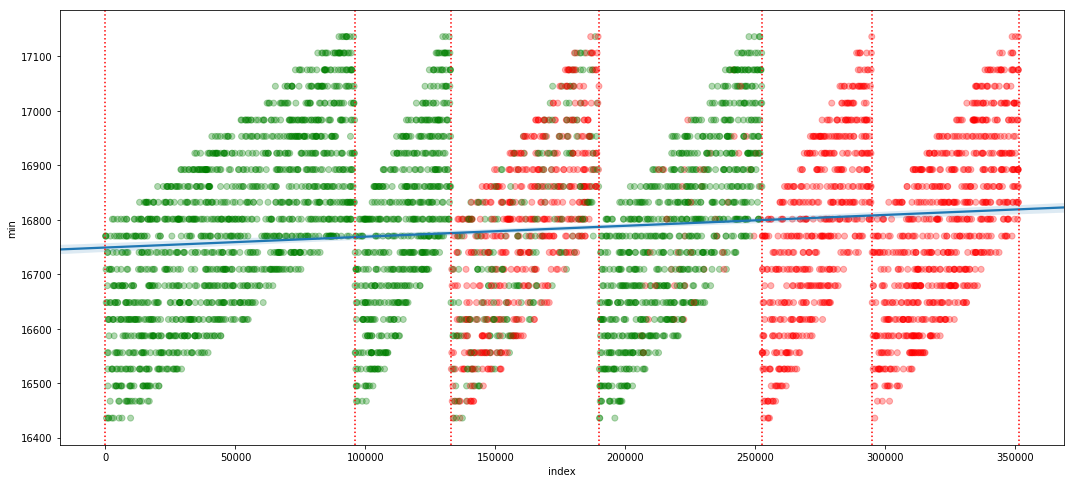

In [69]:
fig = plt.figure(figsize=(18, 8))
sample = df_claim_dates.sample(5000)
ax = sns.regplot(
    x=sample["index"], 
    y=sample["min"].astype("int32"), 
    scatter_kws={'c': sample['color'], 'color': None, 'alpha': 0.3})
plt.axvline(x=0, linestyle="dotted", color="red")
plt.axvline(x=95943, linestyle="dotted", color="red")
plt.axvline(x=132800, linestyle="dotted", color="red")
plt.axvline(x=189940, linestyle="dotted", color="red")
plt.axvline(x=252695, linestyle="dotted", color="red")
plt.axvline(x=294932, linestyle="dotted", color="red")
plt.axvline(x=351267, linestyle="dotted", color="red")

We can also plot the full dataset:

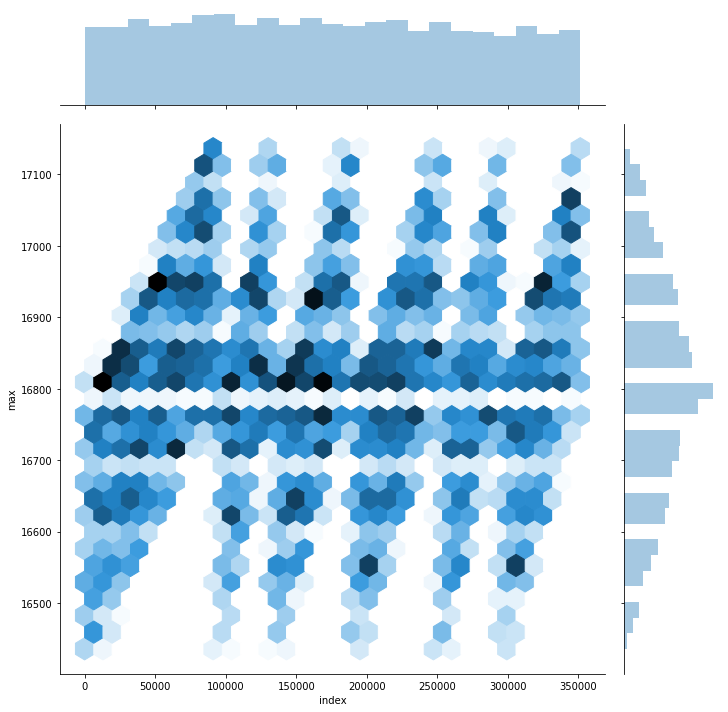

In [70]:
sample = df_claim_dates.sample(10000)
sns.jointplot(x=sample["index"], y=sample["max"].astype("int32"), kind="hex", height=10)

#### Check Insurance Coverage
(Sorry this section is somewhat out of place)

Check if a policy has only one type of insurance coverage:

In [71]:
df_n_main_coverages = df_policy.groupby("Policy_Number")[
    "Main_Insurance_Coverage_Group"
].nunique().to_frame("coverages").reset_index()
df_claim_dates = df_claim_dates.merge(df_n_main_coverages, on="Policy_Number")
df_claim_dates["color"] = "green"
df_claim_dates.loc[df_claim_dates["coverages"]==2, "color"] = "blue"
df_claim_dates.loc[df_claim_dates["coverages"]==3, "color"] = "red"

Apparantly not:

In [72]:
tmp = indices.merge(df_n_main_coverages, on="Policy_Number")
tmp.head(20)

,Policy_Number,index,dataset,coverages
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,1
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,1
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,2
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,1
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,3
5,8a1bcfe8f801ec0b9230d5e2eafeb025c6b4945f,5,train,1
6,17ccb5ec55e642270298b3bbc959ff7c0ecfa6b1,6,train,1
7,9f4f41b3412390a9cb4b125f61aee2626317d34f,7,train,2
8,8004afed773c3ca2f9187cf035a89be9f65cadae,8,train,2
9,a6a67a68608192aa1ed5debc11d1b8a91a48716c,9,train,2


### Check Other Feature Distributions

#### Insurance Coverage

In [73]:
cnt = df_policy.Insurance_Coverage.value_counts()
cnt.head()

16G    336203
16P    335896
29K    205953
29B    162005
05N    115789
Name: Insurance_Coverage, dtype: int64

In [74]:
tmp = indices.merge(df_policy[["Policy_Number", "Insurance_Coverage"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,Insurance_Coverage
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,16G
1,79110176bf64b5094c19aad785aeac56e36cb609,0,train,16P
2,61a449f6180b23379a584af904d7412205d8ff8c,1,train,16G
3,61a449f6180b23379a584af904d7412205d8ff8c,1,train,16P
4,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,05N


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


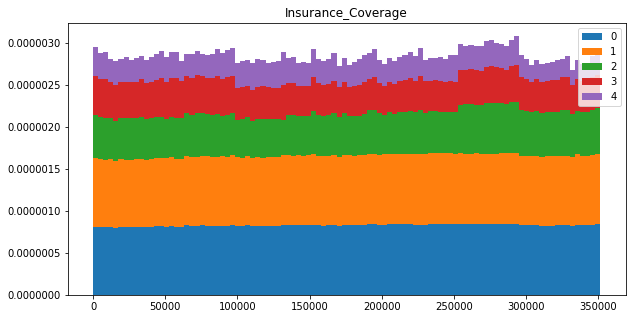

In [75]:
N = 5
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.Insurance_Coverage==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("Insurance_Coverage")
ax.legend()

#### Manafactured_Year_and_Month

In [76]:
cnt = df_policy.Manafactured_Year_and_Month.value_counts()
cnt.head()

2011    144866
2005    131041
2010    128116
2012    124572
2013    109206
Name: Manafactured_Year_and_Month, dtype: int64

In [77]:
tmp = indices.merge(df_policy[["Policy_Number", "Manafactured_Year_and_Month"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,Manafactured_Year_and_Month
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,2010
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,2006
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,2006
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,2002
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,2001


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


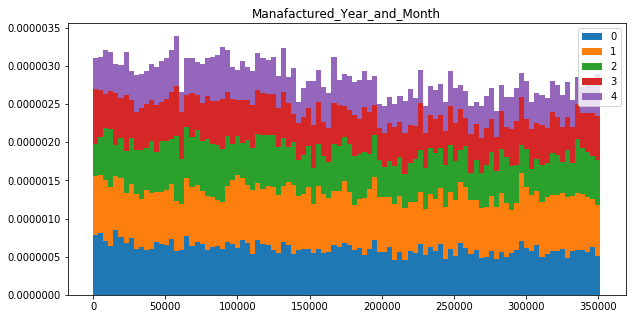

In [78]:
N = 5
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.Manafactured_Year_and_Month==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("Manafactured_Year_and_Month")
ax.legend()

#### Has prior policy

In [79]:
df_policy["has_prior"] = df_policy.Prior_Policy_Number.isnull()
cnt = df_policy.has_prior.value_counts()
cnt

False    1419385
True      328557
Name: has_prior, dtype: int64

In [80]:
tmp = indices.merge(df_policy[["Policy_Number", "has_prior"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,has_prior
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,False
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,False
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,False
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,False
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,False


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


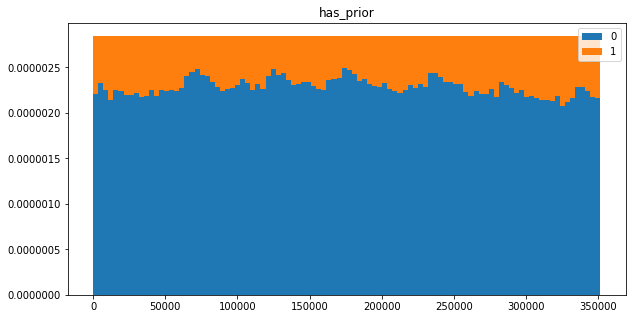

In [81]:
N = 3
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.has_prior==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("has_prior")
ax.legend()

#### Distribution Channel

In [82]:
cnt = df_policy.Distribution_Channel.value_counts()
cnt.head()

39005d92752d56310b3a357f42b57f304621689a    910637
5037717f120cf25bbeea6a42e62676bc5c911b12    197353
315b39a0fc19fb45d146c17b813d46c7acb0b872    175664
cc7533150432c2d0fe3dbb2b31308d4774bf63e0     47502
b5b69d907b43e39e97633b946d6c6d0111d94b75     28471
Name: Distribution_Channel, dtype: int64

In [83]:
tmp = indices.merge(df_policy[["Policy_Number", "Distribution_Channel"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,Distribution_Channel
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,5037717f120cf25bbeea6a42e62676bc5c911b12
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,5037717f120cf25bbeea6a42e62676bc5c911b12
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,86418116e42c87c4d555d363b14b11827f39b8c4
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,73c6b1b689003f77fe700bb5176d5e94a4aebe3e
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,d848c10f78f75a4e2d5828bbba71686f225ce31f


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


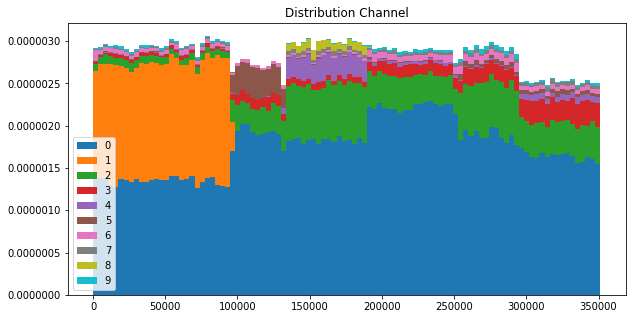

In [84]:
N = 10
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.Distribution_Channel==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("Distribution Channel")
ax.legend()


In [85]:
tmp[tmp.Distribution_Channel==cnt.index[1]]["index"].max()

95943

Find the splitting point:

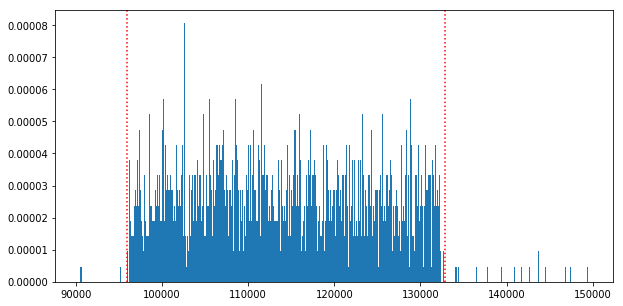

In [86]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
subset = tmp[tmp.Distribution_Channel==cnt.index[5]]["index"]
subset = subset[(subset > 90000) & (subset < 150000)]
_ = ax.hist(
    subset, 1000, 
    density=True)
plt.axvline(x=95943, linestyle="dotted", color="red")
plt.axvline(x=132800, linestyle="dotted", color="red")

#### iply_area

In [87]:
cnt = df_policy.iply_area.value_counts(dropna=False)
cnt.head()

761f22b2c1593d0bb87e0b606f990ba4974706de    263126
c1dfd96eea8cc2b62785275bca38ac261256e278    240524
c66c65175fecc3103b3b587be9b5b230889c8628    225576
bd307a3ec329e10a2cff8fb87480823da114f8f4    199221
356a192b7913b04c54574d18c28d46e6395428ab    172209
Name: iply_area, dtype: int64

First only check test policies:

In [88]:
# tmp = indices.merge(df_policy[["Policy_Number", "iply_area"]].drop_duplicates(), on="Policy_Number")
tmp = indices.merge(df_policy[["Policy_Number", "iply_area"]][
    df_policy.Policy_Number.isin(df_test.Policy_Number)].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,iply_area
0,21a42238c333ad57d0f8a1560c75ecd614e9e537,132854,test,bd307a3ec329e10a2cff8fb87480823da114f8f4
1,ce5b9a53317a385ec30c4ecbd0b7b7eec3986a53,132855,test,bd307a3ec329e10a2cff8fb87480823da114f8f4
2,6796b993947fdf4459f864a508bed08d0bd890f7,132856,test,bd307a3ec329e10a2cff8fb87480823da114f8f4
3,eed9dae63afca093472c1a7d6e9fb13f518f86bb,132857,test,fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b
4,262ab98ec3d6a0e735e8eac151200ab11eb5d61d,132859,test,bd307a3ec329e10a2cff8fb87480823da114f8f4


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


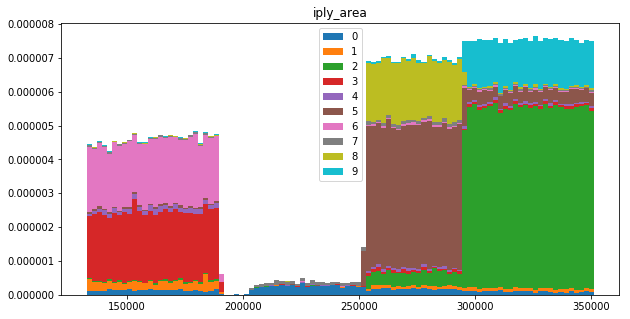

In [89]:
N = 10
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.iply_area==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("iply_area")
ax.legend()

Find the splitting point:

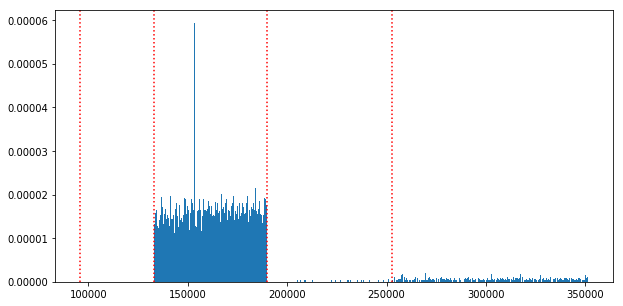

In [90]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
subset = tmp[tmp.iply_area==cnt.index[3]]["index"]
_ = ax.hist(
    subset, 1000, 
    density=True)
plt.axvline(x=95943, linestyle="dotted", color="red")
plt.axvline(x=132800, linestyle="dotted", color="red")
plt.axvline(x=189940, linestyle="dotted", color="red")
plt.axvline(x=252695, linestyle="dotted", color="red")

In [91]:
subset[subset < 200000].max()

189940

In [92]:
subset.max()

351240

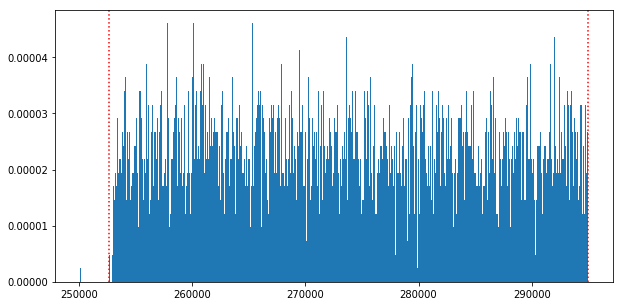

In [93]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
subset = tmp[tmp.iply_area==cnt.index[8]]["index"]
subset = subset[(subset < 295000) & (subset > 250000)]
_ = ax.hist(
    subset, 1000, 
    density=True)
# plt.axvline(x=95943, linestyle="dotted", color="red")
# plt.axvline(x=132800, linestyle="dotted", color="red")
# plt.axvline(x=189940, linestyle="dotted", color="red")
plt.axvline(x=252695, linestyle="dotted", color="red")
plt.axvline(x=294932, linestyle="dotted", color="red")

In [94]:
subset.max()

294932

Now check the full dataset:

/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


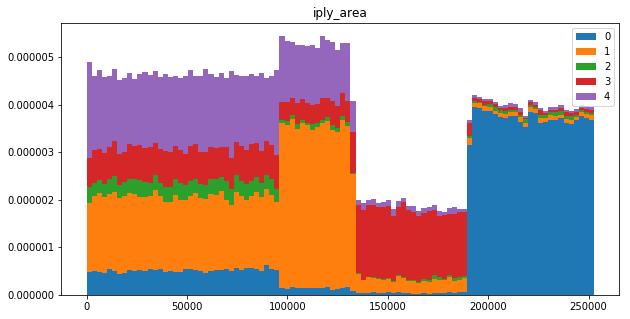

In [95]:
tmp = indices.merge(df_policy[["Policy_Number", "iply_area"]][
    df_policy.Policy_Number.isin(df_train.Policy_Number)].drop_duplicates(), on="Policy_Number")
N = 5
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.iply_area==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("iply_area")
ax.legend()

#### Distribution_Channel + iply_area

In [96]:
df_policy["combo"] = df_policy["Distribution_Channel"].astype("str") + "_" + df_policy["iply_area"].astype("str")
cnt = df_policy.combo.value_counts(dropna=False)
cnt.head(10)

39005d92752d56310b3a357f42b57f304621689a_761f22b2c1593d0bb87e0b606f990ba4974706de    156781
39005d92752d56310b3a357f42b57f304621689a_c1dfd96eea8cc2b62785275bca38ac261256e278    124318
39005d92752d56310b3a357f42b57f304621689a_c66c65175fecc3103b3b587be9b5b230889c8628    108937
39005d92752d56310b3a357f42b57f304621689a_356a192b7913b04c54574d18c28d46e6395428ab     98734
39005d92752d56310b3a357f42b57f304621689a_bd307a3ec329e10a2cff8fb87480823da114f8f4     86494
39005d92752d56310b3a357f42b57f304621689a_511a418e72591eb7e33f703f04c3fa16df6c90bd     82673
39005d92752d56310b3a357f42b57f304621689a_fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b     57857
39005d92752d56310b3a357f42b57f304621689a_98fbc42faedc02492397cb5962ea3a3ffc0a9243     48712
5037717f120cf25bbeea6a42e62676bc5c911b12_c1dfd96eea8cc2b62785275bca38ac261256e278     39473
5037717f120cf25bbeea6a42e62676bc5c911b12_bd307a3ec329e10a2cff8fb87480823da114f8f4     28581
Name: combo, dtype: int64

In [97]:
tmp = indices.merge(df_policy[["Policy_Number", "combo"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,combo
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,5037717f120cf25bbeea6a42e62676bc5c911b12_c1dfd...
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,5037717f120cf25bbeea6a42e62676bc5c911b12_fa35e...
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,86418116e42c87c4d555d363b14b11827f39b8c4_c1dfd...
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,73c6b1b689003f77fe700bb5176d5e94a4aebe3e_356a1...
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,d848c10f78f75a4e2d5828bbba71686f225ce31f_356a1...


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


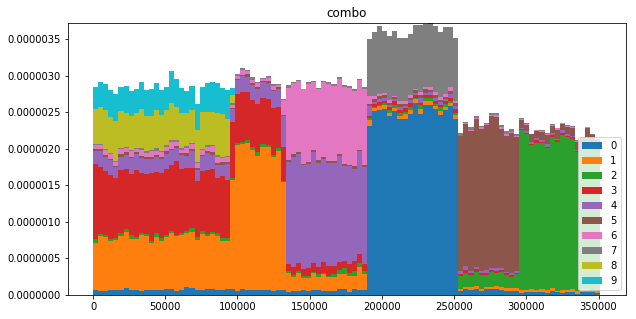

In [98]:
N = 10
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.combo==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("combo")
ax.legend()

#### fmarriage

In [99]:
df_policy["fmarriage"].fillna(" ", inplace=True)
cnt = df_policy.fmarriage.value_counts(dropna=False)
cnt

1    919849
2    510328
     317765
Name: fmarriage, dtype: int64

In [100]:
tmp = indices.merge(df_policy[["Policy_Number", "fmarriage"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,fmarriage
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,1
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,1
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,2
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,1
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


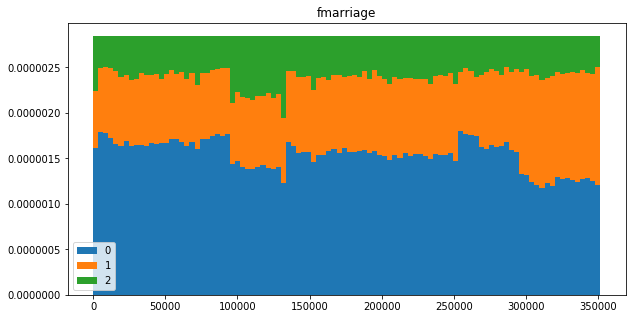

In [101]:
N = 3
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.fmarriage==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("fmarriage")
ax.legend()

#### aassured_zip

In [102]:
cnt = df_policy.aassured_zip.value_counts()
cnt.head(20)

e26973e6ee8ab9cd8cb3f207d1b90f00d2669eff    47363
a609bb8ab05a0d13db9eb1d0d3b1383d1703c17d    43694
7fdec83a2662ffe53af456402cbaeafa380b15b4    35473
e6de89674d9f1d7968a70dad4f41b844965b4fdc    29971
425ac6a281919b17c4d550ebeb2a5a130e579c7f    29611
b202977c0fc07e1c6b31961a905395a8ffb23121    29333
f37062d9a65543a46f2ba13299ba77a370a1c4eb    27143
2019219149608a3f188cafaabd3808aace3e3309    26707
ecb7937db58ec9dea0c47db88463d85e81143032    26417
cd0613ba91fbab0c5af2827e308e487e267d28a0    26220
86e55aec99bfd3868b399afe0c5069bd2a7b7d18    25593
851cd04fbcac9538616f1d147d7930db87b8750d    25134
eadc1dd8fc279583d5552700ae5d248e3fa123bd    24966
15aa0c7e8fbd2923db7041d012e8838d66b9572d    24291
0b7f5ada6bdd5e4844b1dc6da915ace79a38c463    23795
beba4d5d3ffb8fac7fe5ce87ac1eb2f75c4cd1a2    23137
90b9305857ade3ea2021a4dd2723ccd54b46cf57    22432
78a8efcbaaa1a9a30f9f327aa89d0b6acaaffb03    22103
9ffd1ae121c4f26fe7f0c45ecdc85fa6ac245bf0    20777
6e9b99384f21dc46400b5347a3eb341f6daeb334    19841


In [103]:
tmp = indices.merge(df_policy[["Policy_Number", "aassured_zip"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,aassured_zip
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,9a70776c743352cfcf688e52512673332e5e4007
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,e26973e6ee8ab9cd8cb3f207d1b90f00d2669eff
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,9ffd1ae121c4f26fe7f0c45ecdc85fa6ac245bf0
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,17503a6b2326f09fbc4e3a7c03874c7333002038
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,78a8efcbaaa1a9a30f9f327aa89d0b6acaaffb03


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


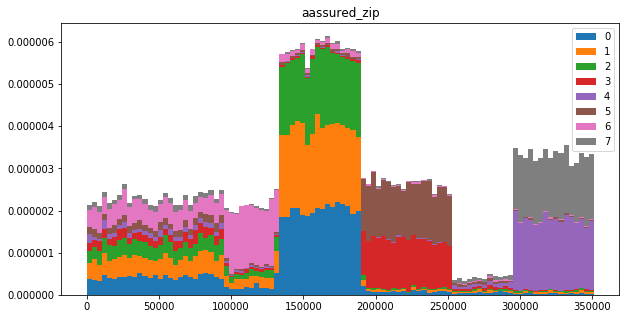

In [104]:
N = 8
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.aassured_zip==i]["index"] for i in cnt.index[:N]
    ], 100, 
    label = range(N),
    stacked=True, density=True)
plt.title("aassured_zip")
ax.legend()

#### qpt

In [105]:
df_policy.qpt.value_counts()

5.00     1393667
7.00      119541
3.00       88836
2.00       75671
8.00       29702
4.00       20649
6.00       14388
9.00        3376
19.00       1868
20.00        170
24.00         27
17.00         18
11.00          6
13.00          6
18.00          6
21.00          4
22.00          3
23.00          2
12.00          2
Name: qpt, dtype: int64

In [106]:
tmp = indices.merge(df_policy[["Policy_Number", "qpt"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,qpt
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,5.00
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,5.00
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,5.00
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,5.00
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,5.00


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


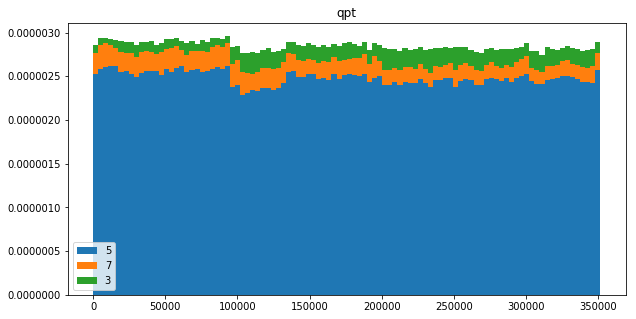

In [107]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.qpt==5]["index"],
        tmp[tmp.qpt==7]["index"],
        tmp[tmp.qpt==3]["index"]
    ], 100, 
    label = [5, 7, 3],
    stacked=True, density=True)
plt.title("qpt")
ax.legend()

In [108]:
df_policy.Cancellation.value_counts()

     1419397
Y     328545
Name: Cancellation, dtype: int64

#### Cancellation

In [109]:
tmp = indices.merge(df_policy[["Policy_Number", "Cancellation"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,Cancellation
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


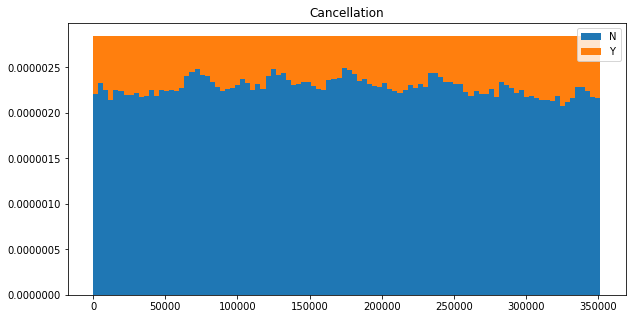

In [110]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
_ = ax.hist(
    [
        tmp[tmp.Cancellation==" "]["index"],
        tmp[tmp.Cancellation=="Y"]["index"]
    ], 100, 
    label = ['N', 'Y'],
    stacked=True, density=True)
plt.title("Cancellation")
ax.legend()

In [111]:
df_policy.iply_area.value_counts()

761f22b2c1593d0bb87e0b606f990ba4974706de    263126
c1dfd96eea8cc2b62785275bca38ac261256e278    240524
c66c65175fecc3103b3b587be9b5b230889c8628    225576
bd307a3ec329e10a2cff8fb87480823da114f8f4    199221
356a192b7913b04c54574d18c28d46e6395428ab    172209
511a418e72591eb7e33f703f04c3fa16df6c90bd    154333
fa35e192121eabf3dabf9f5ea6abdbcbc107ac3b    106498
98fbc42faedc02492397cb5962ea3a3ffc0a9243     90395
6c1e671f9af5b46d9c1a52067bdf0e53685674f7     57824
59129aacfb6cebbe2c52f30ef3424209f7252e82     50873
fb644351560d8296fe6da332236b1f8d61b2828a     40351
f1abd670358e036c31296e66b3b66c382ac00812     36182
1d513c0bcbe33b2e7440e5e14d0b22ef95c9d673     25737
17ba0791499db908433b80f37c5fbc89b870084b     25224
0286dd552c9bea9a69ecb3759e7b94777635514b     22821
7b52009b64fd0a2a49e6d8a939753077792b0554     21115
76546f9a641ede2beab506b96df1688d889e629a     14341
2d0c8af807ef45ac17cafb2973d866ba8f38caa9       659
4d89d294cd4ca9f2ca57dc24a53ffb3ef5303122       655
4cd66dfabbd964f8c6c4414b07cdb45

#### Imported_or_Domestic_Car

In [112]:
df_policy.Imported_or_Domestic_Car.value_counts(dropna=False)

10    1346381
30     218102
40     134929
20      15375
24      14459
50      12249
90       5353
21        858
22        207
23         29
Name: Imported_or_Domestic_Car, dtype: int64

In [113]:
tmp = indices.merge(df_policy[["Policy_Number", "Imported_or_Domestic_Car"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,Imported_or_Domestic_Car
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,10
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,10
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,10
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,40
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,24


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Imported_or_Domestic_Car')

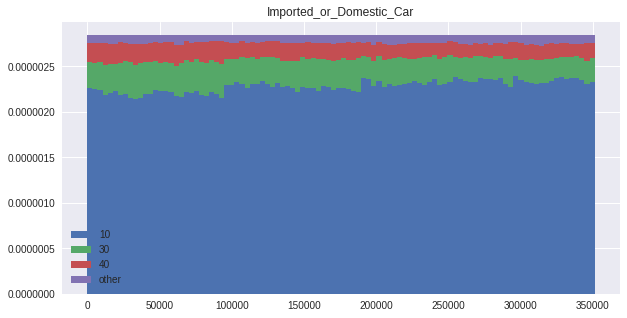

In [114]:
fig = plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
_ = plt.hist(
    [
        tmp[tmp.Imported_or_Domestic_Car==10]["index"],
        tmp[tmp.Imported_or_Domestic_Car==30]["index"],
        tmp[tmp.Imported_or_Domestic_Car==40]["index"],
        tmp[~tmp.Imported_or_Domestic_Car.isin((10, 30, 40))]["index"],
    ], 100, 
    label = [10, 30, 40, "other"],
    stacked=True, density=True)
ax = plt.subplot(111)
ax.legend()
plt.title("Imported_or_Domestic_Car")

#### lia_class

In [115]:
df_policy.lia_class.value_counts(dropna=False)

-1     933512
 1     169977
 2     160553
 4     143075
 3     139606
 0     137184
 5      23191
 6      16440
 7      12273
 8       4428
 9       3064
 10      1868
 11       835
 12       790
 13       408
 14       216
 15       191
 16       145
 18        74
 19        68
 17        44
Name: lia_class, dtype: int64

In [116]:
tmp = indices.merge(df_policy[["Policy_Number", "lia_class"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,lia_class
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,3
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,1
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,6
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,4
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,0


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'lia_class')

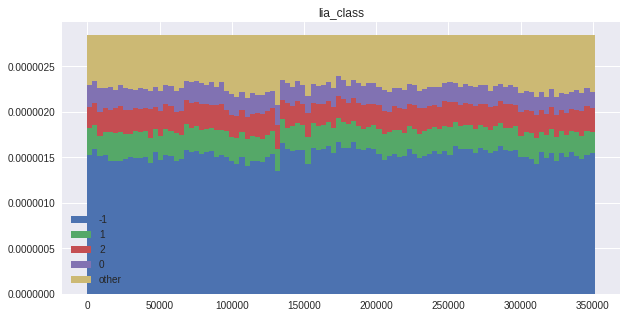

In [117]:
fig = plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
_ = plt.hist(
    [
        tmp[tmp.lia_class==-1]["index"],
        tmp[tmp.lia_class==1]["index"],
        tmp[tmp.lia_class==2]["index"],
        tmp[tmp.lia_class==0]["index"],
        tmp[tmp.lia_class>2]["index"]
    ], 
    100, label=[-1, 1, 2, 0, "other"], 
    stacked=True, density=True)
ax = plt.subplot(111)
ax.legend()
plt.title("lia_class")

#### fsex

In [118]:
df_policy["fsex"].fillna(" ",inplace=True)
df_policy["fsex"].unique()

array(['2', '1', ' '], dtype=object)

In [119]:
tmp = indices.merge(df_policy[["Policy_Number", "fsex"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,fsex
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,2
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,2
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,2
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,1
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,


/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'fsex')

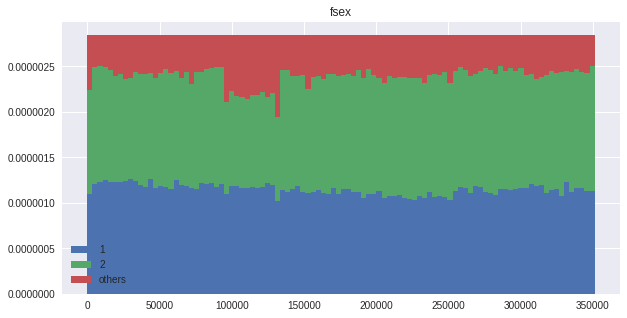

In [120]:
fig = plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
_ = plt.hist(
    [
        tmp[tmp.fsex=='1']["index"],
        tmp[tmp.fsex=='2']["index"],
        tmp[tmp.fsex==' ']["index"],
    ], 100, label=["1", "2", "others"],
    stacked=True, density=True)
ax = plt.subplot(111)
ax.legend()
plt.title("fsex")

#### fassured

In [121]:
df_policy["fassured"].unique()

array([1, 2, 3, 6])

In [122]:
tmp = indices.merge(df_policy[["Policy_Number", "fassured"]].drop_duplicates(), on="Policy_Number")
tmp.head()

,Policy_Number,index,dataset,fassured
0,79110176bf64b5094c19aad785aeac56e36cb609,0,train,1
1,61a449f6180b23379a584af904d7412205d8ff8c,1,train,1
2,1a1f5f582bf1ff23467352e8f2fd31acefddc654,2,train,1
3,6b420a887376f4dce53e22e600f2ca56aadec0ee,3,train,1
4,15a5e6b7c385d23c01bf4eaa49f310d638d7d3d9,4,train,2


In [123]:
df_claim_dates = df_claim_dates.merge(df_policy[["Policy_Number", "fassured"]].drop_duplicates(), on="Policy_Number")

In [124]:
df_claim_dates["color"] = "green"
df_claim_dates.loc[df_claim_dates["fassured"]==2, "color"] = "blue"
df_claim_dates.loc[df_claim_dates["fassured"]==3, "color"] = "red"
df_claim_dates.loc[df_claim_dates["fassured"]==6, "color"] = "purple"

In [125]:
tmp.fassured.value_counts()

1    294456
2     56314
3       502
6         1
Name: fassured, dtype: int64

/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/home/ceshine/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


Text(0.5,1,'fassured')

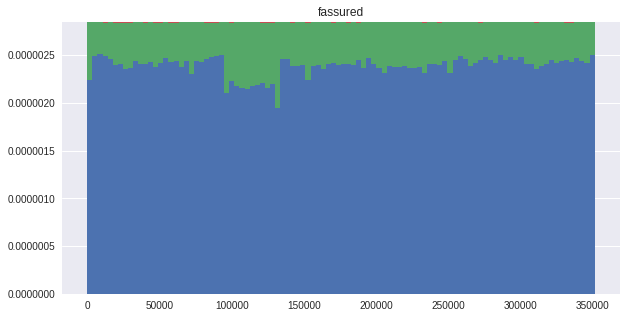

In [126]:
fig = plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
_ = plt.hist(
    [
        tmp[tmp.fassured==1]["index"],
        tmp[tmp.fassured==2]["index"],
        tmp[tmp.fassured==3]["index"],
        tmp[tmp.fassured==6]["index"],
    ],
    100, stacked=True, density=True)
ax = plt.subplot(111)
ax.legend()
plt.title("fassured")